In [45]:
# Stock Price Prediction using Recurrent Neural Network  
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [46]:
# Stocks of Tata Consultancy Services (TCS) traded at NSE, Mumbai
df = pd.read_csv('/content/INFY.NS.csv')

In [47]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-09,486.125000,488.475006,482.500000,485.174988,424.313354,10545692
1,2017-01-10,488.500000,490.500000,483.975006,485.274994,424.400848,11939854
2,2017-01-11,487.100006,489.225006,481.975006,484.549988,423.766754,12241574
3,2017-01-12,488.774994,502.200012,488.774994,500.024994,437.300568,11855740
4,2017-01-13,515.000000,520.000000,481.350006,487.899994,426.696564,31276246


In [48]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [49]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1.236000e+03
mean,858.568811,867.878520,849.494396,858.621481,817.463916,9.041517e+06
std,390.376627,393.707356,386.905229,390.319727,405.578198,8.182042e+06
min,440.000000,443.799988,430.000000,436.700012,387.773254,4.834070e+05
25%,581.937500,588.893753,574.068741,582.650024,525.365784,5.502343e+06
50%,721.000000,729.674988,712.875000,720.949982,674.129394,7.197279e+06
75%,1070.500000,1082.399994,1058.149994,1072.937531,1052.158447,1.010220e+07
max,1900.000000,1914.050049,1887.750000,1899.150024,1899.150024,1.644050e+08


In [50]:
df_close = df['Close']
print(df_close)

0        485.174988
1        485.274994
2        484.549988
3        500.024994
4        487.899994
           ...     
1231    1898.449951
1232    1899.150024
1233    1844.650024
1234    1817.800049
1235    1814.300049
Name: Close, Length: 1236, dtype: float64


In [51]:
df_close.shape

(1236,)

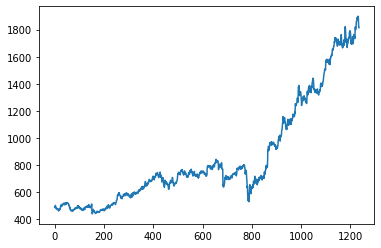

In [52]:
%matplotlib inline
plt.plot(df_close)

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df_close = scaler.fit_transform(np.array(df_close).reshape(-1,1))

In [54]:
print(df_close)

[[0.03314642]
 [0.0332148 ]
 [0.03271905]
 ...
 [0.96273377]
 [0.94437418]
 [0.94198094]]


In [55]:
# splitting the dataset into training data and test data
train_size = int(len(df_close) * 0.75)
test_size = len(df_close) - train_size
train_data, test_data = df_close[:train_size, :], df_close[train_size:len(df_close), :]

In [56]:
train_size, test_size

(927, 309)

In [57]:
print(train_data)

[[0.03314642]
 [0.0332148 ]
 [0.03271905]
 [0.04330061]
 [0.03500973]
 [0.02812062]
 [0.02803515]
 [0.02646243]
 [0.02895824]
 [0.02574447]
 [0.02711203]
 [0.0246675 ]
 [0.02160756]
 [0.02350508]
 [0.02596668]
 [0.01887242]
 [0.01482101]
 [0.02136825]
 [0.02143661]
 [0.02114601]
 [0.02353926]
 [0.02157338]
 [0.02482135]
 [0.03244554]
 [0.0379329 ]
 [0.03907825]
 [0.03706108]
 [0.04742041]
 [0.0433177 ]
 [0.04678792]
 [0.04793325]
 [0.03991589]
 [0.04630926]
 [0.04752299]
 [0.04752299]
 [0.05188212]
 [0.0512496 ]
 [0.05395054]
 [0.05487367]
 [0.05005298]
 [0.04595028]
 [0.04723237]
 [0.05075386]
 [0.05518138]
 [0.04736914]
 [0.0531471 ]
 [0.05706179]
 [0.0506342 ]
 [0.05451467]
 [0.05275392]
 [0.05711304]
 [0.05401894]
 [0.0531471 ]
 [0.05530104]
 [0.05417278]
 [0.05200177]
 [0.05089062]
 [0.04629217]
 [0.04189886]
 [0.04314676]
 [0.03697561]
 [0.02735136]
 [0.03205238]
 [0.03263358]
 [0.01982974]
 [0.01760744]
 [0.01683818]
 [0.01565865]
 [0.01842797]
 [0.01719716]
 [0.01817155]
 [0.01

In [58]:
print(test_data)

[[0.49307671]
 [0.47885397]
 [0.45919517]
 [0.47235802]
 [0.47126398]
 [0.47919586]
 [0.4866149 ]
 [0.47341792]
 [0.4689391 ]
 [0.46206703]
 [0.44729732]
 [0.43751925]
 [0.43635677]
 [0.42661285]
 [0.43461317]
 [0.42794628]
 [0.44941703]
 [0.45628909]
 [0.4622722 ]
 [0.4785463 ]
 [0.44743412]
 [0.4689391 ]
 [0.46569112]
 [0.4701015 ]
 [0.4764265 ]
 [0.4697596 ]
 [0.46076791]
 [0.45133166]
 [0.45584462]
 [0.48080273]
 [0.48093954]
 [0.46425519]
 [0.46257987]
 [0.45355396]
 [0.47943517]
 [0.48152074]
 [0.47164001]
 [0.47724709]
 [0.48329856]
 [0.49003382]
 [0.50497448]
 [0.49988033]
 [0.49676907]
 [0.49769225]
 [0.49088855]
 [0.49847853]
 [0.49403394]
 [0.5149578 ]
 [0.5064105 ]
 [0.53594993]
 [0.55820714]
 [0.54658281]
 [0.54948889]
 [0.55632673]
 [0.55393349]
 [0.56008755]
 [0.56326707]
 [0.5822763 ]
 [0.58607134]
 [0.57807102]
 [0.56442956]
 [0.59858454]
 [0.64241508]
 [0.63937227]
 [0.64990256]
 [0.63851754]
 [0.62104683]
 [0.5985504 ]
 [0.60169579]
 [0.61728601]
 [0.61745696]
 [0.61

In [59]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]  
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [60]:
# reshape into X = t,t+1,t+2,t+3 and Y = t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [61]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (826, 100)
Shape of y_train: (826,)


In [62]:
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_test: (208, 100)
Shape of y_test: (208,)


In [63]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [64]:
# Stacked LSTM
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [65]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=100, batch_size = 64, verbose = 1)

Epoch 1/100
13/13 [==============================] - 8s 278ms/step - loss: 0.0086 - val_loss: 0.1487
Epoch 2/100
13/13 [==============================] - 2s 182ms/step - loss: 0.0023 - val_loss: 0.0126
Epoch 3/100
13/13 [==============================] - 2s 179ms/step - loss: 9.6438e-04 - val_loss: 0.0055
Epoch 4/100
13/13 [==============================] - 2s 183ms/step - loss: 7.3988e-04 - val_loss: 0.0013
Epoch 5/100
13/13 [==============================] - 2s 181ms/step - loss: 6.5618e-04 - val_loss: 0.0011
Epoch 6/100
13/13 [==============================] - 2s 175ms/step - loss: 6.4636e-04 - val_loss: 0.0011
Epoch 7/100
13/13 [==============================] - 2s 175ms/step - loss: 6.0089e-04 - val_loss: 0.0010
Epoch 8/100
13/13 [==============================] - 2s 175ms/step - loss: 5.7268e-04 - val_loss: 9.4637e-04
Epoch 9/100
13/13 [==============================] - 2s 176ms/step - loss: 5.5648e-04 - val_loss: 0.0013
Epoch 10/100
13/13 [==============================] - 2s 18

In [67]:
# doing prediction and checking performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [68]:
# transforming back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [69]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
# train data RMSE
math.sqrt(mean_squared_error(y_train, train_predict))

696.5139954725846

In [70]:
# test data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

1723.7312373522764

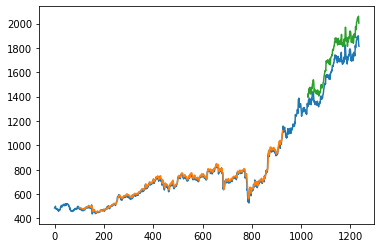

In [71]:
# Plotting 
# shift train predictions for plotting
look_back = 100
trainPredictPlot = np.empty_like(df_close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df_close)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back*2) +1:len(df_close)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [72]:
len(test_data)

309

In [73]:
x_input = test_data[209:].reshape(1,-1)
x_input.shape

(1, 100)

In [74]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [75]:
print(temp_input)

[0.8668330552141976, 0.8923040112772072, 0.8866969321068321, 0.8863550400791407, 0.8903210211057797, 0.87808127010361, 0.8881329456339735, 0.882765173788381, 0.8698417221524832, 0.862491043557118, 0.8682347626114963, 0.8486101937274284, 0.8563711263452058, 0.864268865006512, 0.8846114406541505, 0.868371569338809, 0.8592088465858618, 0.8580805864836629, 0.8582857545219125, 0.8543539962034612, 0.8716536828884103, 0.8653629030843071, 0.8578755011832842, 0.8555163962759773, 0.8764401712760901, 0.8753803559064828, 0.8929194340216531, 0.9074839844850708, 0.8782864381418596, 0.8550035582344402, 0.858525062530479, 0.8468665108807836, 0.8399945310404222, 0.849293977782811, 0.8589011772663582, 0.8457383342002391, 0.8576703324612505, 0.8801326222697585, 0.8576361097530627, 0.8536702121480784, 0.8701151687637991, 0.8745939878319751, 0.9268351060740392, 0.9473486277355234, 0.9338096706173091, 0.9005094199418009, 0.8773633467616941, 0.8689869920832547, 0.8663543564591936, 0.8836199038576096, 0.86649

In [76]:
# demonstrate prediction for next 30 days
lst_output = []
n_steps = 100
i = 0
while(i < 30):
    
    if(len(temp_input) > 100):
        # print(temp_input)
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        # print(x_input)
        yhat = model.predict(x_input, verbose = 0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        # print(temp_input)
        lst_output.extend(yhat.tolist())
        i = i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose = 0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i+1
    
print(lst_output)

[1.055586]
101
1 day input [0.89230401 0.88669693 0.88635504 0.89032102 0.87808127 0.88813295
 0.88276517 0.86984172 0.86249104 0.86823476 0.84861019 0.85637113
 0.86426887 0.88461144 0.86837157 0.85920885 0.85808059 0.85828575
 0.854354   0.87165368 0.8653629  0.8578755  0.8555164  0.87644017
 0.87538036 0.89291943 0.90748398 0.87828644 0.85500356 0.85852506
 0.84686651 0.83999453 0.84929398 0.85890118 0.84573833 0.85767033
 0.88013262 0.85763611 0.85367021 0.87011517 0.87459399 0.92683511
 0.94734863 0.93380967 0.90050942 0.87736335 0.86898699 0.86635436
 0.8836199  0.86649116 0.84177235 0.86385861 0.86238846 0.86553385
 0.86977328 0.88946629 0.89288521 0.89127834 0.88659443 0.91866384
 0.92341619 0.92693769 0.92362127 0.91811686 0.90444118 0.88905604
 0.86108925 0.87914117 0.85811481 0.86132856 0.87247427 0.87401279
 0.89681697 0.88813295 0.86061064 0.87179049 0.90030425 0.90721045
 0.90433859 0.89435536 0.89948374 0.88720977 0.91278331 0.94645968
 0.93145065 0.94013467 0.94909223 0

In [77]:
# creating an instance of ndarray with evenly spaced values
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)

In [78]:
print(len(df_close))

1236


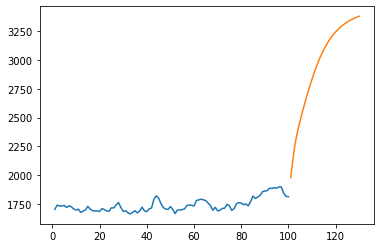

In [79]:
plt.plot(day_new, scaler.inverse_transform(df_close[1136:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

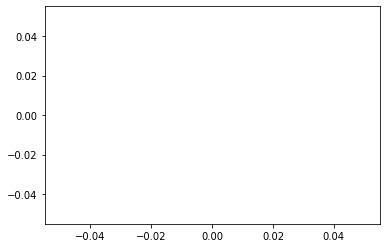

In [80]:
dataset_close = df_close.tolist()
dataset_close.extend(lst_output)
plt.plot(dataset_close[4059:])

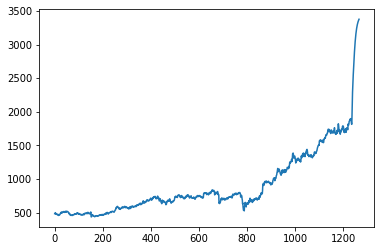

In [81]:
dataset_close = scaler.inverse_transform(dataset_close).tolist()
plt.plot(dataset_close)

In [82]:
# calculating performance metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
# decide on a cutoff limit
cutoff = 0.7  
# initialise a matrix full with zeroes
train_predict_classes = np.zeros_like(train_predict) 
# add a 1 if the cutoff was breached
train_predict_classes[train_predict > cutoff] = 1 
# for the actual values
y_train_classes = np.zeros_like(y_train)
y_train_classes[y_train > cutoff] = 1
# train data
print("Accuracy Score of Train Data:", accuracy_score(y_train_classes, train_predict_classes))
print("Precision Score of Train Data:", precision_score(y_train_classes, train_predict_classes))
print("Recall Score of Train Data:", recall_score(y_train_classes, train_predict_classes))

Accuracy Score of Train Data: 0.0
Precision Score of Train Data: 0.0
Recall Score of Train Data: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
# initialise a matrix full with zeroes
test_predict_classes = np.zeros_like(test_predict) 
# add a 1 if the cutoff was breached
test_predict_classes[test_predict > cutoff] = 1 
# for the actual values
y_test_classes = np.zeros_like(y_test)
y_test_classes[y_test > cutoff] = 1
# test data
print("Accuracy Score of Test Data:", accuracy_score(y_test_classes, test_predict_classes))
print("Precision Score of Test Data:", precision_score(y_test_classes, test_predict_classes))
print("Recall Score of Test Data:", recall_score(y_test_classes, test_predict_classes))

Accuracy Score of Test Data: 0.6875
Precision Score of Test Data: 0.6875
Recall Score of Test Data: 1.0
